# SciPy Optimize shgo

shgo stands for "simplicial homolopy global optimization".  [This site](https://stefan-endres.github.io/shgo/) provides a good explanation of the algorithm.

`sgho` supports constraints.  All global minimization methods focus on only certain fixed ranges, but `shgo` allows for much more versatile and tailored ranges than simple boxes.

Finds local minima as well.

In [2]:
# Importing the packages for the example
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

Defining functions for the tutorial:

In [3]:
f = lambda x : 1/50*(x[0]**2 + x[1]**2) - np.cos(x[0])*np.cos(x[1])

df = lambda x : np.array([1/25*x[0]+np.sin(x[0])*np.cos(x[1]),
                          1/25*x[1]+np.cos(x[0])*np.sin(x[1])])

Now that we've defined these functions, what do they look like?

No handles with labels found to put in legend.


Text(0, 0.5, 'x[1]')

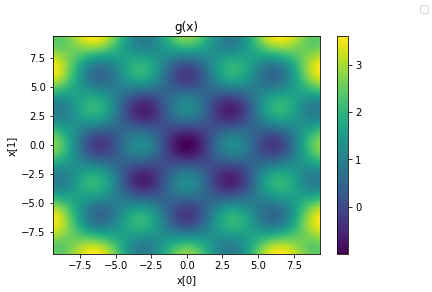

In [4]:
x0=np.arange(-3*np.pi,3*np.pi,.05)

x0_a, x1_a = np.meshgrid(x0,x0)

# plotting our test functions
fig, ax = plt.subplots()
pos = ax.pcolormesh(x0_a,x1_a,f([x0_a,x1_a]) )

# labeling and measuring necessities
fig.legend()
fig.colorbar(pos,ax=ax)
ax.set_title('g(x)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')

## Simple Call

At it's most simple form, `shgo` takes the function and bounds for the problem.  

The bounds are a sequence, either tuple or array, of tuples specifying the lower and upper boundaries for the problem.

In [5]:
x0_lower = -3*np.pi
x0_upper = 3*np.pi

x1_lower = -3*np.pi
x1_upper = 3*np.pi

bounds = ((x0_lower,x0_upper),(x1_lower,x1_upper))

In [6]:
result = optimize.shgo(f,bounds)
print(result)

     fun: -1.0
    funl: array([-1.])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 2
   nlfev: 4
   nlhev: 0
   nljev: 1
 success: True
       x: array([0., 0.])
      xl: array([[0., 0.]])


## Answer Object

The algorithm returns an `OptimizeResult` object containing extra information.

Individual pieces of data can be retrieved as

In [31]:
result.xl

array([[0., 0.]])

Availible data types can be determined by:

In [8]:
result.keys()

dict_keys(['nfev', 'nlfev', 'nljev', 'nlhev', 'xl', 'funl', 'x', 'fun', 'nit', 'message', 'success'])

## Function Parameters

If the function has parameters, then they can be passed to the routine in a tuple through the `args` flag:

In [9]:
f_parameter = lambda x,a : (x[0]-a)**2 + x[1]**2

result_parameter = optimize.shgo(f_parameter,bounds,args=(0.5,) )
print(result_parameter.x)

[ 5.00000000e-01 -7.45058071e-09]


In [33]:
result_iters = optimize.shgo(f,bounds,iters=5)

No handles with labels found to put in legend.


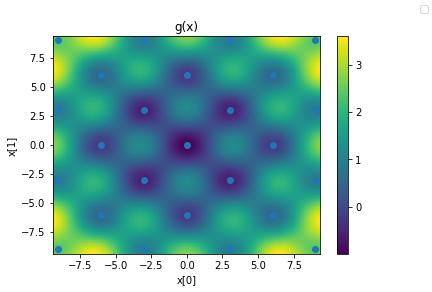

In [41]:
# plotting our test functions
fig, ax = plt.subplots()
pos = ax.pcolormesh(x0_a,x1_a,f([x0_a,x1_a]) )

# labeling and measuring necessities
fig.legend()
fig.colorbar(pos,ax=ax)
ax.set_title('g(x)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')

plt.scatter(result_iters.xl[:,0],result_iters.xl[:,1])

## Constraints

Constraints to shgo are the same type as those for [SLSQP](./Optimization_ND.ipynb#constraint_SLSQP).

The domain, $\vec{x}$ region over which you look the minimum, is where the either a number of <b>inequality constraints</b>:
$$
c(\vec{x}) \geq 0
$$
or <b>equality constraints</b>:
$$
c(\vec{x}) = 0
$$
hold.

For this example, I define two constraints, 
$$
c_1(x) = -x_0^2 - x_1^2 + 9 \qquad c_2(x) = x_0^3 - x_1
$$

In [16]:
c1 = lambda x : - x[0]**2 - x[1]**2 + 9
c2 = lambda x : x[0]**3 - x[1]

To visualize a constraint, I use `np.where` to generate data points where a condition holds.  
Here I will look at where the constraint functions `c1` and `c2` give the inequality condition to be true.

I can also rewrite the constraints into a more geometric, intuitive form:
We can get the constraints into a more geometric form,
$$
c_1: \pm \sqrt{x_0^2 + 3^2} \geq x_1 \qquad c_2: x_0^3 \geq x_1
$$

(-4, 4)

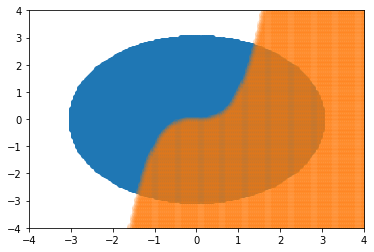

In [20]:
# determining where the constraints hold
x0_a_constraint1 = np.where(c1([x0_a,x1_a])>0,x0_a,np.nan)
x1_a_constraint1 = np.where(c1([x0_a,x1_a])>0,x1_a,np.nan)

x0_a_constraint2 = np.where(c2([x0_a,x1_a])>0,x0_a,np.nan)
x1_a_constraint2 = np.where(c2([x0_a,x1_a])>0,x1_a,np.nan)

plt.scatter(x0_a_constraint1,x1_a_constraint1)
plt.scatter(x0_a_constraint2,x1_a_constraint2,alpha=0.1)

# labeling and measuring necessities
plt.xlim((-4,4))
plt.ylim((-4,4))

So how do we construct this dictionary?

We simply need to define the <b>type</b> and the <b>function</b> `fun`.  

For more than one constraint in the same dictionary, there must still be only one function that returns a numpy array.

In [27]:
# just one constraint
ineq_cons1 = {'type':'ineq',
            'fun': c1}

# having two constraints at once
ineq_cons2 = {'type':'ineq',
             'fun': lambda x : np.array([c1(x) , c2(x)]) }

For an inequality constraint, this looks like:

In [23]:
eq_cons = {'type':'eq',
            'fun':c1}

The jacobian of a constraint can also be included as:

In [24]:
d_c1 = lambda x : np.array([-2*x[0]+1,1])

ineq_cons1_jac = {'type' : 'ineq',
                 'fun' : c1,
                 'jac' : d_c1} 

Finally, the dictionary can be included as:

In [25]:
result_constrained = optimize.shgo(f,bounds,constraints=ineq_cons1)

Inequality and equality constraits can be included simulataneously through:

In [30]:
result_constrained = optimize.shgo(f,bounds,constraints=[ineq_cons1,eq_cons])